###Mod8 Project 1: CryVesto ForeCast Program###

Step 1: Review the libraries and dependencies that have been imported

In [97]:
#Imports for Analysis and MC Simulation Program:
from pathlib import Path
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import hvplot.pandas
import os
import requests
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
%matplotlib inline
from MCForecastTools import MCSimulation

Step 2: Create an environment file (.env)

Step3: Load the environment variable by calling the load_dotenv() function.
Set the value of the variables alpaca_api_key and alpaca_secret_key equal to their respective environment variables.
Confirm the variables are available by checking the type of each.

In [98]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [99]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key)) 

str

str

Step 4: Set up the Alpaca API REST object. Make sure that this object includes your Alpaca API key, your Alpaca secret key, and a reference to the version that you’re using

In [100]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2") 

Step 5: Use the Alpaca SDK to make an Alpaca API call to get 3 years of daily historical price data from 2016-19 for the following ETFs: SPY, QQQ, TWO, ARKK, RPV, BND   
They are selected to emulate key models of benchmark indexs and asset themes for allocation and comparison purposes. 

Create the list for the required tickers.  
Set the values for start_date and end_date using the pd.Timestamp function. The dates should be 2016-01-01 through 2019-12-31.   
Set the timeframe value to 1 day.   
Create the portfolio_prices_df DataFrame by setting it equal to the alpaca.get_bars function. 

In [101]:
# Create the list for the top ETF tickers
etf_tickers = ['SPY', 'QQQ', 'VTWO', 'ARKK', 'RPV', 'BND', 'BITO'] 
etf_tickers

['SPY', 'QQQ', 'VTWO', 'ARKK', 'RPV', 'BND', 'BITO']

In [102]:
# Top Crypto Coin Tickers by mkt-cap (no stable_coins) 
#crypto_tickers = ['BTC', 'ETH', 'XRP', 'LUNA', 'SOL', 'ADA']
# crypto_tickers

In [103]:
# Get market cap for top 10 crypto coins 
# How do we visualize using a pie chart?
#mc_data = pdr.get_data_iex(crypto_tickers)
#mc = mc_data['marketCap']
#mc

In [104]:
#Get closing prices from start 2016 to present 
# IGNORE ERROR THIS IS BC THE CRYPTOS DIDNT EXIST AT THAT TIME
#start = dt.datetime(2020, 1, 1)
#end = dt.datetime(2021, 5, 5)
 
#crypto_2016_present = pdr.get_data_IEX(tickers, start, end)

#crypto_2016_present["Close"].tail()

In [105]:
# Set the values for start_date and end_date using the pd.Timestamp function
# Inside the function set the date parameter to the prior business day 
# The start and end data should be 2016-01-01 to 2019-12-31
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()  
end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()  

Create a Python list named savings_data that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio

In [106]:
# Set timeframe to one day (1Day)
timeframe="1Day"

In [107]:
# Historical Data for top 10 crypto coins 2016 - 2019
# IGNORE ERROR THIS IS BC THE CRYPTOS DIDNT EXIST AT THAT TIME
#start = dt.datetime(2016, 1, 1)
#end = dt.datetime(2018, 12, 31)
 
#hist_2016_2019 = pdr.get_data_yahoo(tickers, start, end)
#hist_1_close = hist_2016_2019['Close'].hvplot(title = "2016 - 2019 Historical Close Price", ylabel = "Closing Price",
#    height = 600, width = 1200)
#hist_1_close          

In [108]:
# Use the Alpaca get_bars function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit 
limit_rows = 10000
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
etf_prices_df = alpaca.get_bars(etf_tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
SPY = etf_prices_df[etf_prices_df['symbol']=='SPY'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
QQQ = etf_prices_df[etf_prices_df['symbol']=='QQQ'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'],axis=1)
VTWO = etf_prices_df[etf_prices_df['symbol']=='VTWO'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
ARKK = etf_prices_df[etf_prices_df['symbol']=='ARKK'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1) 
RPV = etf_prices_df[etf_prices_df['symbol']=='RPV'].drop(['symbol','open', 'high', 'low','volume', 'trade_count', 'vwap'], axis=1)
BND = etf_prices_df[etf_prices_df['symbol']=='BND'].drop(['symbol','open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
BITO = etf_prices_df[etf_prices_df['symbol']=='BITO'].drop(['symbol','open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1) 
# Concatenate the ticker DataFrames
etf_prices_df = pd.concat([SPY, QQQ, VTWO, ARKK, RPV, BND, BITO], axis=1, keys=["SPY", "QQQ", "VTWO", "ARKK", "RPV", "BND", "BITO"])

# Review the first five rows of the resulting DataFrame 
#display(etf_prices_df.head())
display(etf_prices_df.head())
display(etf_prices_df.tail())

,SPY,QQQ,VTWO,ARKK,RPV,BND,BITO
,close,close,close,close,close,close,close
timestamp,,,,,,,
2019-01-02 05:00:00+00:00,250.18,154.88,108.17,37.42,57.50,79.37,NaN
2019-01-03 05:00:00+00:00,244.21,149.82,106.12,36.19,56.65,79.68,NaN
2019-01-04 05:00:00+00:00,252.39,156.23,110.05,38.43,58.69,79.44,NaN
2019-01-07 05:00:00+00:00,254.38,158.09,112.12,40.10,59.30,79.32,NaN
2019-01-08 05:00:00+00:00,256.77,159.52,113.83,40.22,59.69,79.22,NaN


,SPY,QQQ,VTWO,ARKK,RPV,BND,BITO
,close,close,close,close,close,close,close
timestamp,,,,,,,
2021-12-27 05:00:00+00:00,477.26,403.48,90.35,97.41,80.29,84.87,32.46
2021-12-28 05:00:00+00:00,476.87,401.61,89.83,95.63,80.68,84.86,30.24
2021-12-29 05:00:00+00:00,477.48,401.55,89.90,93.83,80.88,84.58,29.89
2021-12-30 05:00:00+00:00,476.16,400.35,89.91,96.70,80.80,84.77,29.81
2021-12-31 05:00:00+00:00,474.96,397.85,89.81,94.59,80.83,84.75,28.90


In [109]:
etf_index_daily_rtns = etf_prices_df.pct_change().dropna() 
etf_index_cumltv_rtns = (1 + etf_index_daily_rtns).cumprod()

display(etf_index_cumltv_rtns.head())
#display(etf_index_cumltv_rtns.tail()) 

,SPY,QQQ,VTWO,ARKK,RPV,BND,BITO
,close,close,close,close,close,close,close
timestamp,,,,,,,
2021-10-20 04:00:00+00:00,1.003928,0.998695,1.006683,0.992475,1.016581,0.998823,1.031950
2021-10-21 04:00:00+00:00,1.006546,1.004794,1.009203,1.000502,1.012184,0.997411,0.973534
2021-10-22 04:00:00+00:00,1.005503,0.996351,1.006574,0.984532,1.017837,0.999529,0.942060
2021-10-25 04:00:00+00:00,1.010896,1.006552,1.016544,1.018478,1.017586,1.000000,0.967573
2021-10-26 04:00:00+00:00,1.011805,1.009721,1.008984,1.013378,1.013064,1.002000,0.955174


<AxesSubplot:title={'center':'Volatility of ETF Indexes'}>

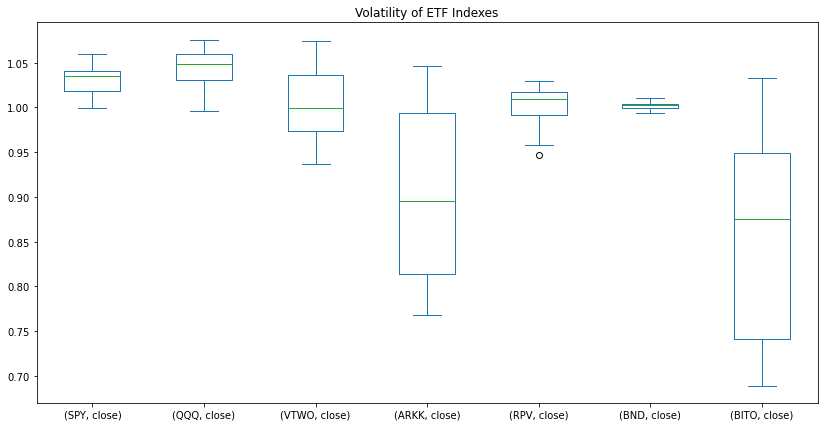

In [110]:
# Use the cumulative daily return data to create box plots to visualize the volatility of 7 ETF and the S&P 500 
# Include a title parameter and adjust the figure size
etf_index_cumltv_rtns.plot(kind='box', figsize=(12,6), xlabel='ETF Indexes', title="Volatility of ETF Indexes")

In [69]:
# Top Crypto Coin Tickers by mkt-cap (no stable_coins) 
#crypto_tickers = ['BTC', 'ETH', 'XRP', 'LUNA', 'SOL', 'ADA']
#crypto_tickers

In [70]:
# Top Crypto etf Coin Tickers
#crypto_etf_tickers = ['BITO', 'BTF', 'XBTF'] 
#crypto_etf_tickers 

['BITO', 'BTF', 'XBTF']

In [71]:
# Set timeframe to one day (1Day)
# timeframe="1Day"

In [72]:
#start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()  
#end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat() 

In [73]:
# Use the Alpaca get_bars function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit 
#limit_rows = 10000
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
#crypt_prices_df = alpaca.get_bars(crypto_tickers, timeframe, start=start_date, end=end_date).df
#crypto_etf_prices = alpaca.get_bars(crypto_etf_tickers, timeframe, start=start_date, end=end_date).df
# Reorganize the DataFrame
# Separate ticker data
#BTC = crypt_prices_df[crypt_prices_df['symbol']=='BTCUSD'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)  
#ETH = crypt_prices_df[crypt_prices_df['symbol']=='BTCUSD'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
#XRP = crypt_prices_df[crypt_prices_df['symbol']=='XRP'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
#LUNA = crypt_prices_df[crypt_prices_df['symbol']=='TRXUSD'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1) 
#SOL = crypt_prices_df[crypt_prices_df['symbol']=='SOLUSD'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
#ADA = crypt_prices_df[crypt_prices_df['symbol']=='ADA'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
#BITO = crypto_etf_prices[crypto_etf_prices['symbol']=='BITO'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
#BTF = crypto_etf_prices[crypto_etf_prices['symbol']=='BTF'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
#XBTF = crypto_etf_prices[crypto_etf_prices['symbol']=='XBTF'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)                                              

# Concatenate the ticker DataFrames
#crypt_prices_df = pd.concat([BTC, ETH, XRP, LUNA, SOL], axis=1, keys=["BTC", "ETH", "XRP", "LUNA", "SOL", "ADA"])
#crypto_etf_prices = pd.concat([BITO, BTF, XBTF], axis=1, keys=["BITO", "BTF", "XBTF"]) 

# Review the first five rows of the resulting DataFrame 
#display(crypto_etf_prices.head())
#display(crypto_etf_prices.tail())  
#error in not getting the designated start date from above code [start_date = pd.Timestamp("2019-01-01"..)];=>>>[timestamp: 2021-10-19 04:00...]


In [74]:
#etf_prices_df.info() 

In [75]:
#etf_prices_df.index 

In [76]:
#etf_prices_df.columns 

In [77]:
# Create a Pandas DataFrame called etf_close_prices_df  
#etf_close_prices = pd.DataFrame(etf_prices_df, columns=[('SPY','close'),('QQQ','close'),('VTWO','close'),('ARKK','close'),('RPV','close'),('BND','close')], index=[])  
#prices_square_foot_by_year = housing_units_by_year.loc[:,['sale_price_sqr_foot', 'gross_rent']]
# Display the savings_df DataFrame
#etf_close_prices  

In [78]:
# Calculate the mean values for each neighborhood
#etf_close_prices = etf_prices_df.groupby('timestamp').mean()  
#etf_close_prices

In [79]:
 # this runs
#etf_close_prices = etf_prices_df.drop(columns=[('SPY', 'open'), ( 'SPY', 'high'), ( 'SPY', 'low'), ( 'SPY', 'volume'), 
#        ( 'SPY','trade_count'), ( 'SPY', 'vwap'), ( 'QQQ', 'open'),  ( 'QQQ',  'high'), ( 'QQQ', 'low'), ( 'QQQ', 'volume'), 
#        ( 'QQQ', 'trade_count'), ( 'QQQ', 'vwap'), ('VTWO', 'open'), ('VTWO', 'high'),  ('VTWO', 'low'), ('VTWO', 'volume'), 
#        ('VTWO', 'trade_count'), ('VTWO', 'vwap'), ('ARKK', 'open'), ('ARKK', 'high'),  ('ARKK', 'low'), ('ARKK', 'volume'), 
#        ('ARKK', 'trade_count'), ('ARKK', 'vwap'), ('RPV',  'open'), ( 'RPV', 'high'),  ( 'RPV', 'low'), ( 'RPV', 'volume'),
#        ( 'RPV', 'trade_count'),  ( 'RPV', 'vwap'), ( 'BND', 'open'), ( 'BND', 'high'),  ( 'BND', 'low'), ( 'BND', 'volume'), 
#        ( 'BND', 'trade_count'),  ( 'BND', 'vwap')])
            
# Review the resulting DataFrame
#etf_close_prices

In [80]:
# this doesn't run
# Create a numerical aggregation by grouping the data by year and averaging the results
#etf_close_prices_df = etf_prices_df.groupby([('timestamp'), ('SPY', 'close'), ('QQQ', 'close')]) 

# Review the resulting DataFrame
#etf_close_prices_df 
#<pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000029A587ED5E0>

In [81]:
# Filter out the 'close' column, creating a new DataFrame 
# Keep only timestamp and close
# etf_close_prices_df = etf_close_prices_df[['timestamp', 'close']]  
# prices_square_foot_by_year = housing_units_by_year.loc[:,['sale_price_sqr_foot', 'gross_rent']]
# prices_square_foot_by_year = prices_square_foot_by_year.drop(columns=['housing_units'])

# Review the DataFrame
#etf_close_prices_df.head 
#<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000029A58D4BDF0>>

In [82]:
etf_bal_prices = etf_prices_df.drop(columns=[('ARKK', 'close'), ( 'BITO', 'close')])
etf_bal_prices

,SPY,QQQ,VTWO,RPV,BND
,close,close,close,close,close
timestamp,,,,,
2019-01-02 05:00:00+00:00,250.18,154.88,108.17,57.50,79.37
2019-01-03 05:00:00+00:00,244.21,149.82,106.12,56.65,79.68
2019-01-04 05:00:00+00:00,252.39,156.23,110.05,58.69,79.44
2019-01-07 05:00:00+00:00,254.38,158.09,112.12,59.30,79.32
2019-01-08 05:00:00+00:00,256.77,159.52,113.83,59.69,79.22
...,...,...,...,...,...
2021-12-27 05:00:00+00:00,477.26,403.48,90.35,80.29,84.87
2021-12-28 05:00:00+00:00,476.87,401.61,89.83,80.68,84.86


### Step 6: Create an instance of MCSimulation with the following parameters that simulates the next 2 years of portfolio returns:
weights: Set this parameter to [.20,.20,.20,.20,.20] to evenly invest for major index and asset class ETFs.
num_simulation: Set this parameter to 500 to ensure the reliability of your simulation. 
num_trading_days: Set this parameter to 252*2 to simulate 2 years of trading days.

In [53]:
# Configure a Monte Carlo simulation to forecast 3 years cumulative returns
# Use an even weight of .20 across all 5 stocks
MC_even_weight = MCSimulation(
    portfolio_data = etf_bal_prices,
    weights = [.20,.20,.20,.20,.20],
    num_simulation = 500,
    num_trading_days = 252*2)

# Printing the first five rows of the simulation input data
MC_even_weight.portfolio_data.head() 

SPY                  QQQ                 VTWO  \
                            close daily_return   close daily_return   close   
timestamp                                                                     
2019-01-02 05:00:00+00:00  250.18          NaN  154.88          NaN  108.17   
2019-01-03 05:00:00+00:00  244.21    -0.023863  149.82    -0.032670  106.12   
2019-01-04 05:00:00+00:00  252.39     0.033496  156.23     0.042785  110.05   
2019-01-07 05:00:00+00:00  254.38     0.007885  158.09     0.011906  112.12   
2019-01-08 05:00:00+00:00  256.77     0.009395  159.52     0.009045  113.83   

                                          RPV                 BND               
                          daily_return  close daily_return  close daily_return  
timestamp                                                                       
2019-01-02 05:00:00+00:00          NaN  57.50          NaN  79.37          NaN  
2019-01-03 05:00:00+00:00    -0.018952  56.65    -0.014783  79.68     0.003906  
2019-01-04 05:00:00+00:00     0.037034  58.69     0.036011  79.44    -0.003012  
2019-01-07 05:00:00+00:00     0.018810  59.30     0.010394  79.32    -0.001511  
2019-01-08 05:00:00+00:00     0.015252  59.69     0.006577  79.22    -0.001261

In [54]:
#whales_spx_cumltv_rtns = (1 + whales_spx_daily_rtns).cumprod()

#whales_spx_cumltv_rtns.tail() 

### Step 7: Run the Monte Carlo simulation. Using MCSimulation functions, visualize the simulation results by using both an overlay line plot and a histogram. Generate the summary statistics for the simulation.

In [55]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gotha\Onedrive\Desktop\FinTek-Workspace\Mod8_Wrkspc\M8P1-ForeCast_Program\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994638,0.996040,0.995146,1.012359,0.990607,1.000579,0.990423,0.995879,1.006884,0.986210,...,1.002402,0.990743,0.995614,1.008474,1.011946,0.997417,0.995106,0.997832,1.008685,1.006571
2,0.996540,1.005151,0.988825,0.999452,1.005195,0.994712,0.982599,1.001027,1.012560,0.972262,...,1.001704,0.985206,0.997773,1.010467,1.014143,0.998410,1.006919,0.977902,1.009178,1.023087
3,0.986983,1.009765,0.983101,1.019388,1.000877,0.998008,0.981787,0.992486,1.017529,0.956232,...,0.995475,0.977847,0.985659,0.999738,1.017208,0.993377,1.001536,0.984475,1.015120,1.032657
4,0.989130,1.020079,0.973919,1.035242,1.000084,0.988648,0.996662,1.004442,1.010048,0.957109,...,0.990837,0.975038,0.977680,0.997275,1.012296,0.992485,1.008642,0.993625,1.010664,1.022251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.316119,1.417666,1.341136,1.350878,1.657847,1.010991,1.598311,1.416383,1.479509,1.613785,...,1.494965,1.140961,1.652812,1.381244,1.488069,1.113318,1.811138,1.474809,1.588992,1.387866
501,1.321362,1.412579,1.336661,1.341382,1.664846,1.023957,1.596707,1.424193,1.483922,1.618350,...,1.491294,1.148098,1.659834,1.382003,1.496961,1.110893,1.823828,1.487307,1.586911,1.391411
502,1.320595,1.406823,1.325341,1.335876,1.675795,1.027763,1.590842,1.426773,1.481830,1.612728,...,1.504740,1.147750,1.670464,1.369263,1.514982,1.115758,1.849537,1.499466,1.577603,1.393681
503,1.318107,1.407223,1.316804,1.350420,1.652975,1.023553,1.601821,1.434636,1.496573,1.627850,...,1.492906,1.156925,1.657977,1.364066,1.519279,1.105492,1.832840,1.486946,1.573764,1.391749


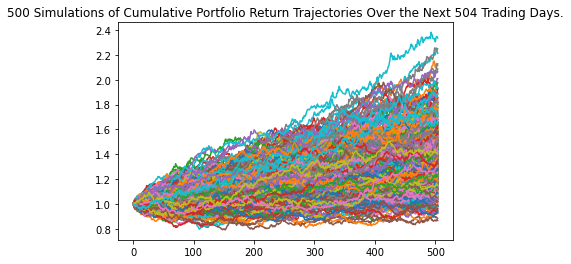

In [85]:
# Visualize the Monte Carlo simulation by creating an overlay line plot
even_weight_line_plot = MC_even_weight.plot_simulation() 

# Save the plot for future use
even_weight_line_plot.get_figure().savefig("MC_2Year_sim_plot.png", bbox_inches="tight") 

In [86]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
#whales_spx_cumltv_rtns.plot(figsize = (16,8), title = "Whales and S&P 500 Cumulative Returns Autumn 2014-2020") 

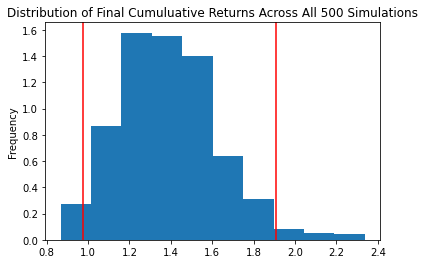

In [87]:
# Visualize the Monte Carlo simulation by creating a histogram
even_weight_distribution_plot = MC_even_weight.plot_distribution() 

# Save the plot for future use
even_weight_distribution_plot.get_figure().savefig('MC_2year_dist_plot.png',bbox_inches='tight') 

In [88]:
# Visualize the Monte Carlo simulation by creating a box chart
#even_weight_distribution_plot = MC_even_weight.plot_distribution(kind='box', figsize=(14,7), title="Box Plot of ETFs vs S&P 500") 

# Save the plot for future use
#even_weight_distribution_plot.get_figure().savefig('MC_2year_dist_plot.png',bbox_inches='tight') 


In [89]:
# Generate the summary statistics for the Monte Carlo simulation
# Save the summary statistics information in a variable called even_weights_table 
even_weight_table = MC_even_weight.summarize_cumulative_return()

# Print the table of summary statistics
print(even_weight_table)  

count           500.000000
mean              1.387564
std               0.239160
min               0.867177
25%               1.211457
50%               1.375751
75%               1.529128
max               2.337096
95% CI Lower      0.976179
95% CI Upper      1.907588
Name: 504, dtype: float64


Step 8: Using a 95% confidence interval and your intial investment

In [90]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the even_weight_table)
# calculate  the range of the possible outcomes for a $10,000 investment 
even_ci_lower = round(even_weight_table[8]*10000,2)
even_ci_upper = round(even_weight_table[9]*10000,2) 

# Print results of your calculations
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" with an even weight portfolio over the next 2 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio with an even weight portfolio over the next 2 years will end within in the range of $9761.79 and $19075.88.


In [91]:
# Prepare for the analysis by converting the dataframe of closing_prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
etf_daily_prices = etf_prices_df.pct_change().dropna() 
display(etf_daily_prices.head())

SPY                                          \
                               open      high       low     close    volume   
timestamp                                                                     
2019-01-03 05:00:00+00:00  0.009103 -0.010509 -0.009270 -0.023863  0.116620   
2019-01-04 05:00:00+00:00 -0.002859  0.018264  0.014364  0.033496 -0.026452   
2019-01-07 05:00:00+00:00  0.020881  0.011220  0.018287  0.007885 -0.274380   
2019-01-08 05:00:00+00:00  0.016221  0.005314  0.009178  0.009395 -0.004225   
2019-01-09 05:00:00+00:00  0.002725  0.006218  0.008622  0.004673 -0.072883   

                                                      QQQ                      \
                          trade_count      vwap      open      high       low   
timestamp                                                                       
2019-01-03 05:00:00+00:00    0.156441 -0.013998  0.010663 -0.015987 -0.009213   
2019-01-04 05:00:00+00:00    0.015386  0.019645 -0.001704  0.024403  0.015051   
2019-01-07 05:00:00+00:00   -0.365106  0.014429  0.028095  0.011847  0.028799   
2019-01-08 05:00:00+00:00    0.026620  0.006989  0.018644  0.007869  0.006982   
2019-01-09 05:00:00+00:00   -0.051775  0.007708  0.003761  0.008825  0.014440   

                           ...       RPV                             BND  \
                           ...    volume trade_count      vwap      open   
timestamp                  ...                                             
2019-01-03 05:00:00+00:00  ... -0.134523    0.130866 -0.005869  0.001387   
2019-01-04 05:00:00+00:00  ... -0.087023   -0.180367  0.025702  0.001008   
2019-01-07 05:00:00+00:00  ... -0.259504   -0.418695  0.010758  0.000000   
2019-01-08 05:00:00+00:00  ... -0.465217    0.080402  0.008212 -0.002768   
2019-01-09 05:00:00+00:00  ...  1.197286    0.421705  0.012836 -0.000126   

                                                                               \
                               high       low     close    volume trade_count   
timestamp                                                                       
2019-01-03 05:00:00+00:00  0.004661  0.001514  0.003906  0.184869   -0.207019   
2019-01-04 05:00:00+00:00 -0.003386 -0.000331 -0.003012 -0.066020    0.208717   
2019-01-07 05:00:00+00:00  0.000377 -0.000662 -0.001511 -0.074726    0.030204   
2019-01-08 05:00:00+00:00 -0.002390 -0.001150 -0.001261 -0.588526   -0.447091   
2019-01-09 05:00:00+00:00  0.000547  0.000379  0.001389  0.139928    0.295644   

                                     
                               vwap  
timestamp                            
2019-01-03 05:00:00+00:00  0.004116  
2019-01-04 05:00:00+00:00 -0.002633  
2019-01-07 05:00:00+00:00 -0.000589  
2019-01-08 05:00:00+00:00 -0.001685  
2019-01-09 05:00:00+00:00  0.000695  

[5 rows x 35 columns]

In [92]:
# Create a DataFrame that includes only the close and daily_returns column from the C table
etf_daily_rtns = etf_daily_prices[['timestamp', 'close']]

display(etf_daily_rtns.head())
#display(etf_daily_rtns.tail())

KeyError: "['timestamp' 'close'] not in index"

In [ ]:
#Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
etf_cumltv_rtns = (1 + etf_daily_rtns).cumprod()

etf_cumltv_rtns.head() 

In [ ]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
#etf_cumltv_rtns.plot(figsize = (16,8), title = "ETF Cumulative Returns Autumn 2016-2020") 

### Step 9: Create a second instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.80, .05, .05, .05, .05]` to represent a portfolio of S&P 500 stks.

In [ ]:
MC_spx = MCSimulation(
    portfolio_data = etf_prices_df,
    weights = [.80, .05, .05, .05, .05],
    num_simulation = 500,
    num_trading_days = 252*2)

# Printing the first five rows of the simulation input data
MC_spx.portfolio_data.head()  

### Step 10: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 10,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after 3years of growth.

In [ ]:
# Run a Monte Carlo simulation to forecast 3 years cumulative returns with 80% SPX etf
MC_spx.calc_cumulative_return()


In [ ]:
# Visualize the Monte Carlo simulation by creating an overlay line plot
spx_wght_line_plot = MC_spx.plot_simulation() 

# Save the plot for future use
spx_wght_line_plot.get_figure().savefig("MC_2Yr_SPX_sim_plot.png", bbox_inches="tight") 

In [ ]:
# Visualize the MC simulation for a majority weight in SPX by creating a histogram
MC_spx_dist_plot = MC_spx.plot_distribution()

In [ ]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in AT&T
# Save the summary statistics information in a variable called att_table 
spx_table = MC_spx.summarize_cumulative_return()

# Print summary statistics
print(spx_table)

In [ ]:
# calculate  the range of the possible outcomes for a $15,000 investment 
spx_ci_lower =round(spx_table[8]*10000,2)
spx_ci_upper = round(spx_table[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" with a 80% weight in SPX over the next 2 years will end within in the range of"
      f" ${spx_ci_lower} and ${spx_ci_upper}.")

### Step 9: Create a 3rd instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.05, .80., 05, .05, .05]` to represent a portfolio of S&P 500 stks.

In [ ]:
MC_qqq = MCSimulation(
    portfolio_data = etf_prices_df,
    weights = [.05, .80, .05, .05, .05],
    num_simulation = 500,
    num_trading_days = 252*2)

# Printing the first five rows of the simulation input data
MC_qqq.portfolio_data.head()  

In [ ]:
MC_qqq.calc_cumulative_return()

In [ ]:
# Visualize the Monte Carlo simulation by creating an overlay line plot
qqq_wght_line_plot = MC_qqq.plot_simulation() 

# Save the plot for future use
qqq_wght_line_plot.get_figure().savefig("MC_2Yr_QQQ_sim_plot.png", bbox_inches="tight") 

In [ ]:
# Visualize the MC simulation for a majority weight in SPX by creating a histogram
MC_QQQ_dist_plot = MC_qqq.plot_distribution()

In [ ]:
# Generate the summary statistics for the MC simulation with majority weight in QQQ
# Save the summary statistics information in a variable called att_table 
qqq_table = MC_qqq.summarize_cumulative_return()

# Print summary statistics
print(qqq_table)

In [ ]:
# calculate  the range of the possible outcomes for a $10,000 investment 
qqq_ci_lower =round(qqq_table[8]*10000,2)
qqq_ci_upper = round(qqq_table[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" with a 80% weight in QQQ over the next 2 years will end within in the range of"
      f" ${qqq_ci_lower} and ${qqq_ci_upper}.")
      

### Create a 4th instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.05, .05, .80, .05, .05]` to represent a portfolio of Russell 2000 stks.

### Step 10: Run the Monte Carlo simulation with the Vanguard Russell 2000(VTWO) ETF weight. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 10,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after 3years of growth.

In [ ]:
# According to the documentation, the MCSimulation module requires us to supply the following parameters to properly configure
# the Monte Carlo simulation:
# Configure a Monte Carlo simulation to forecast 3 years cumulative returns
MC_vtwo = MCSimulation(
    portfolio_data = etf_prices_df,
    weights = [.05, .05, .80, .05, .05],
    num_simulation = 500,
    num_trading_days = 252*2)

# Printing the first five rows of the simulation input data
MC_vtwo.portfolio_data.head()  

In [ ]:
# Printing the simulation input data
MC_vtwo.calc_cumulative_return()

In [ ]:
# Visualize the Monte Carlo simulation by creating an overlay line plot
vtwo_wght_line_plot = MC_vtwo.plot_simulation() 

# Save the plot for future use
vtwo_wght_line_plot.get_figure().savefig("MC_2Yr_VTWO_sim_plot.png", bbox_inches="tight") 

In [ ]:
# Visualize the MC simulation for a majority weight in SPX by creating a histogram
MC_vtwo_dist_plot = MC_vtwo.plot_distribution()

In [ ]:
# Generate the summary statistics for the MC simulation with majority weight in QQQ
# Save the summary statistics information in a variable called att_table 
vtwo_table = MC_vtwo.summarize_cumulative_return()

# Print summary statistics
print(vtwo_table)

In [ ]:
# Using the lower and upper `95%` confidence intervals from the summary statistics,
# calculate the range of the probable cumulative returns for a $10,000 investment
vtwo_ci_95_lower_cumulative_return = round(vtwo_table[8] * 10000,2)
vtwo_ci_95_upper_cumulative_return = round(vtwo_table[9] * 10000,2)


# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the VTWO portfolio"
    f" over the next 2 years will end within in the range of"
    f" ${vtwo_ci_95_lower_cumulative_return: .2f} and ${vtwo_ci_95_upper_cumulative_return: .2f}.")

### Step 9: Create a 5th instance of MCSimulation with the same parameters, but set the '[weights]' parameter to '[.05, .05, 05, .80, .05]' to represent a portfolio of ARK Innovation ETF stks.¶

In [ ]:
# According to the documentation, the MCSimulation module requires us to supply the following parameters to properly configure
# the Monte Carlo simulation:
# Configure a Monte Carlo simulation to forecast 3 years cumulative returns
MC_arkk = MCSimulation(
    portfolio_data = etf_prices_df,
    weights = [.05, .05, .05, .80, .05],
    num_simulation = 500,
    num_trading_days = 252*2)

# Printing the first five rows of the simulation input data
MC_arkk.portfolio_data.head()  

In [ ]:
MC_arkk.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
arkk_wght_line_plot = MC_arkk.plot_simulation()

# Save the plot for future use
arkk_wght_line_plot.get_figure().savefig("MC_2Yr_ARKK_sim_plot.png", bbox_inches="tight")

In [ ]:
# Visualize the MC simulation for a majority weight in ARKK by creating a histogram
MC_arkk_dist_plot = MC_arkk.plot_distribution()

In [ ]:
# Generate the summary statistics for the MC simulation with majority weight in QQQ
# Save the summary statistics information in a variable called att_table 
arkk_table = MC_arkk.summarize_cumulative_return()

# Print summary statistics
print(arkk_table)

In [ ]:
# Using the lower and upper `95%` confidence intervals from the summary statistics,
# calculate the range of the probable cumulative returns for a $10,000 investment
arkk_ci_95_lower = round(arkk_table[8] * 10000,2)
arkk_ci_95_upper = round(arkk_table[9] * 10000,2)


# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the ARKK portfolio"
    f" over the next 2 years will end within in the range of"
    f" ${arkk_ci_95_lower: .2f} and ${arkk_ci_95_upper: .2f}.")

### Step 9: Create a 6th instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.05, .05, .05, .05, .80]` to represent a portfolio of Crypto stocks minus ARK Innovation ETF stks.

### Step 9: Create a 6th instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.05, .05, .05, .05, .80]` to represent a portfolio of Crypto stocks minus ARK Innovation ETF (ARKK) stks.

### Step 9: Create a 6th instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.05, .05, .05, .05, .80]` to represent a portfolio of Crypto stocks minus ARK Innovation ETF stks.

In [ ]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
even_weight_cumltv_rtns = (1 + even_weight_table).cumprod()

even_weight_cumltv_rtns.tail() 

In [ ]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
# whales_spx_daily_rtns.plot(kind='box', figsize=(14,7), title="Box Plot of Whales Daily Returns vs S&P 500")
even_weight_cumltv_rtns.plot(kind='box', figsize=(14,7), title="Box Plot of ETFs vs S&P 500")

In [ ]:
# Generate summary statistics from the Monte Carlo simulation
# Set the summary statistics equal to a variable for future use
MC_summary_statistics = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics Series
print(MC_summary_statistics)

In [ ]:
# Using the lower and upper `95%` confidence intervals from the summary statistics,
# calculate the range of the probable cumulative returns for a $10,000 investment
ci_95_lower_cumulative_return = MC_summary_statistics[8] * 10000
ci_95_upper_cumulative_return = MC_summary_statistics[9] * 10000


# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
    f" over the next 2 years will end within in the range of"
    f" ${ci_95_lower_cumulative_return: .2f} and ${ci_95_upper_cumulative_return: .2f}.")

In [ ]:
 # Top Crypto Coin Tickers by mkt-cap (no stable_coins) 
crypto_tickers = ['BTC', 'ETH', 'XRP', 'LUNA', 'SOL', 'ADA']
crypto_tickers

In [ ]:
start_date = pd.Timestamp( '2019-01-01', tz="America/New_York").isoformat()  
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat() 

In [ ]:
timeframe="1Day" 

limit_rows = 1000

crpto_prices_df = alpaca.get_bars(crypto_tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame and Separate ticker data
BTC = crypto_prices_df[crypto_prices_df['symbol']=='BTC'].drop('symbol', axis=1)
ETH = crypto_prices_df[crypto_prices_dff['symbol']=='ETH'].drop('symbol', axis=1)
XRP = crypto_prices_df[crypto_prices_df['symbol']=='XRP'].drop('symbol', axis=1)
LUNA = crypto_prices_df[crypto_prices_df['symbol']=='LUNA'].drop('symbol', axis=1) 
SOL = crypto_prices_df[crypto_prices_df['symbol']=='SOL'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
crypto_prices_df = pd.concat([BTC, ETH, XRP, LUNA, SOL], axis=1, keys=["BTC", "ETH", "XRP", "LUNA", "SOL"]) 

# Review the first five rows of the resulting DataFrame 
display(crypto_prices_df.head())
display(crypto_prices_df.tail())